# EDA

## 데이터 확인
data 에 있는 파일을 random 9(3x3)개 씩 확인해 보기

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import random

In [ ]:
# CSV 파일 경로
train_csv_path = '../data/train.csv'
meta_csv_path = '../data/meta.csv'

# 데이터 폴더 경로
image_folder_path = '../data/train/'

# CSV 파일 읽기
train_df = pd.read_csv(train_csv_path)
meta_df = pd.read_csv(meta_csv_path)

In [3]:
# 데이터 구조 확인
print("Train CSV Columns:", train_df.columns)
print("Meta CSV Columns:", meta_df.columns)

# 예시 데이터 확인
print("Train Data Sample:\n", train_df.head())
print("Meta Data Sample:\n", meta_df.head())

Train CSV Columns: Index(['ID', 'target'], dtype='object')
Meta CSV Columns: Index(['target', 'class_name'], dtype='object')
Train Data Sample:
                      ID  target
0  002f99746285dfdd.jpg      16
1  008ccd231e1fea5d.jpg      10
2  008f5911bfda7695.jpg      10
3  009235e4c9c07af5.jpg       4
4  00b2f44967580c74.jpg      16
Meta Data Sample:
    target                                         class_name
0       0                                     account_number
1       1  application_for_payment_of_pregnancy_medical_e...
2       2                                      car_dashboard
3       3            confirmation_of_admission_and_discharge
4       4                                          diagnosis


In [15]:
# 'target'과 'class_name'을 매핑하는 딕셔너리 생성
target_to_classname = dict(zip(meta_df['target'], meta_df['class_name']))

# 이미지 파일명과 분류 코드 가져오기
image_files = train_df['ID']
labels = train_df['target']

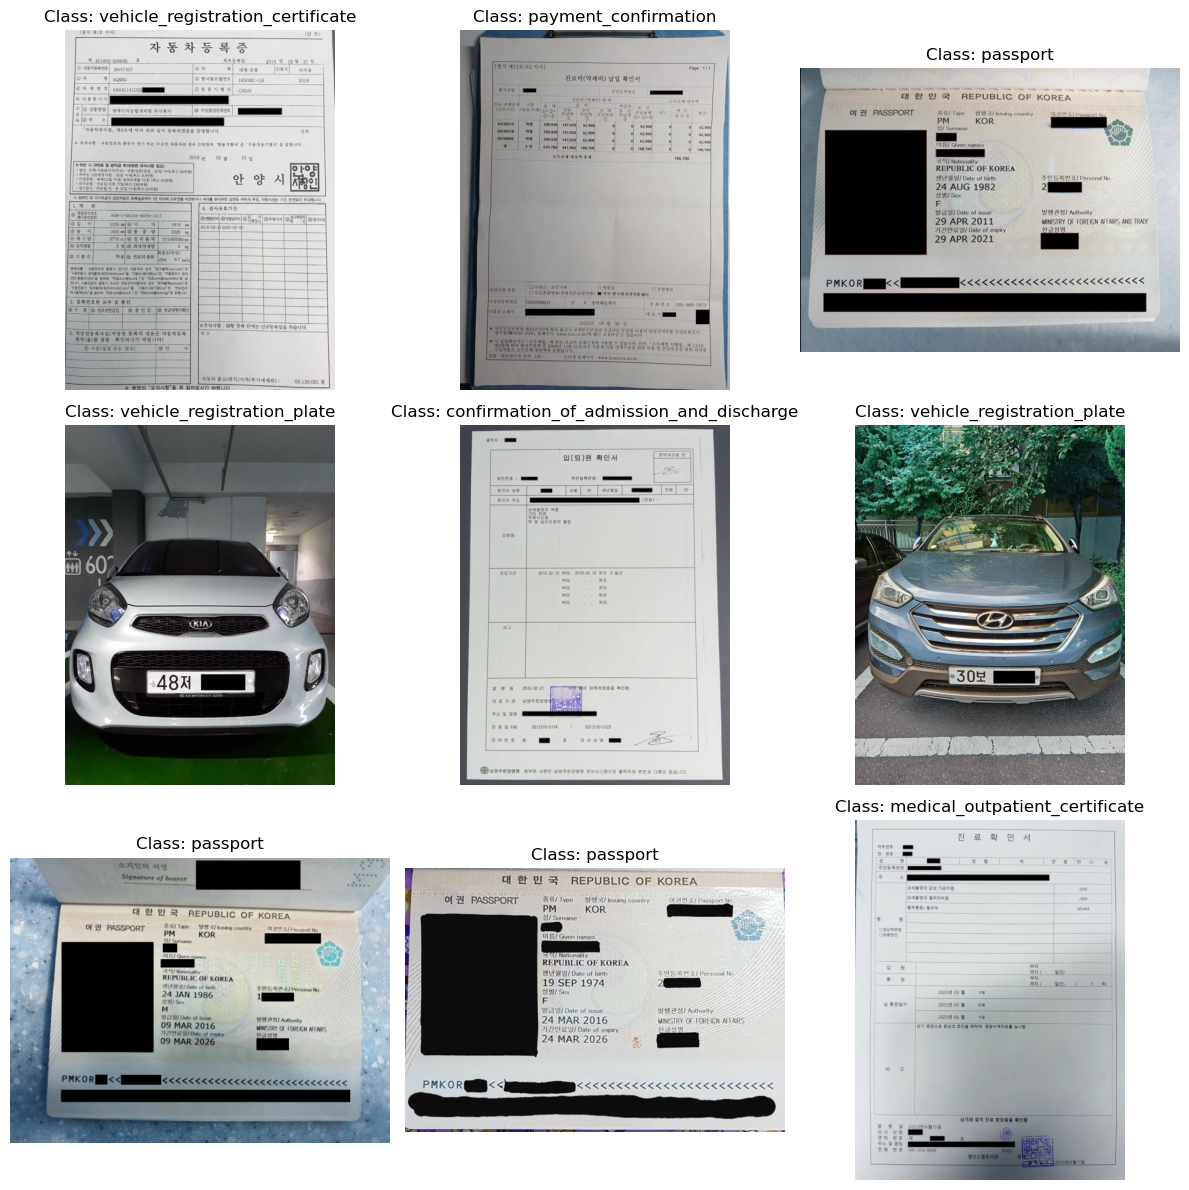

In [24]:
# 랜덤하게 9개의 인덱스 선택
num_images = 9
random_indices = random.sample(range(len(image_files)), num_images)
# 이미지와 라벨 시각화
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, idx in enumerate(random_indices):
    # 이미지 파일 경로
    image_path = os.path.join(image_folder_path, image_files[idx])
    
    # 이미지 열기
    img = Image.open(image_path)
    
    # 이미지 시각화
    row = i // 3
    col = i % 3
    axes[row, col].imshow(img)
    axes[row, col].axis('off')
    # 분류 코드에서 클래스 이름으로 변환하여 표시
    class_name = target_to_classname[labels[idx]]
    axes[row, col].set_title(f"Class: {class_name}")

plt.tight_layout()
plt.show()

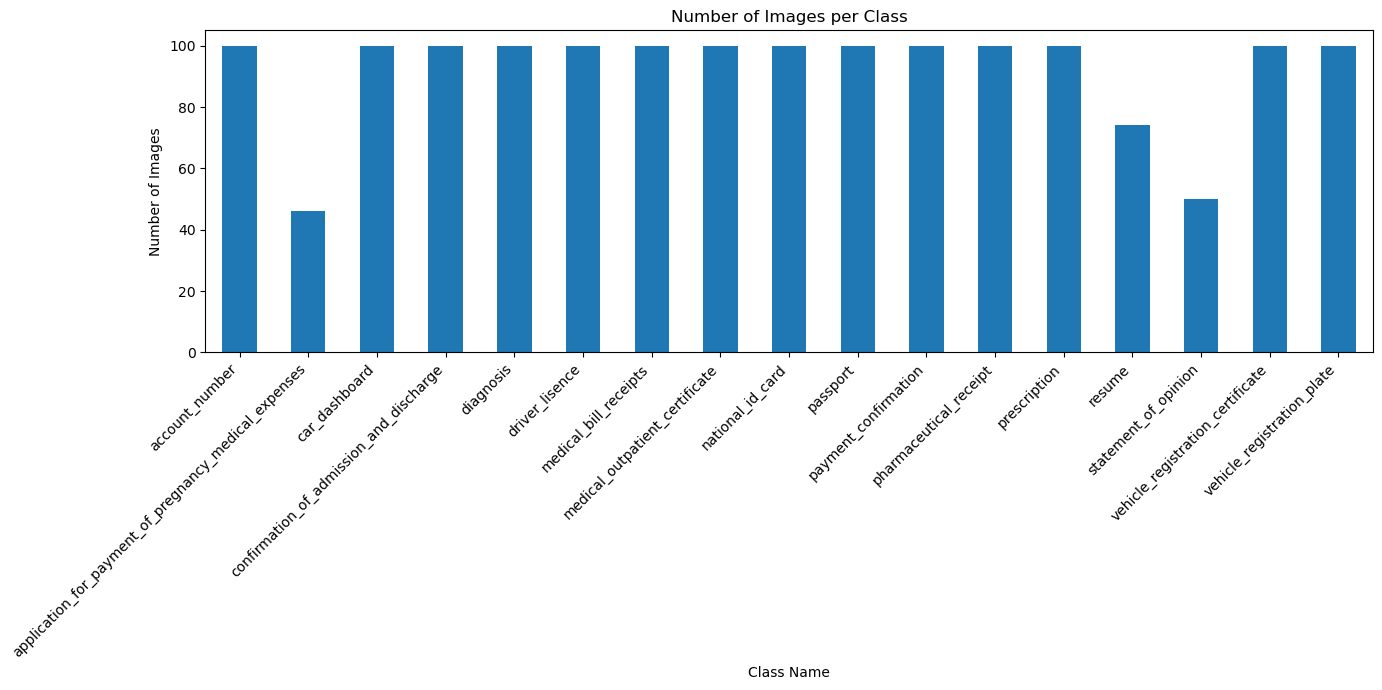

In [25]:
# 클래스 이름을 가진 데이터프레임 생성
train_df['class_name'] = train_df['target'].map(target_to_classname)

# 클래스별 이미지 수 계산
class_counts = train_df['class_name'].value_counts().sort_index()

# 막대 그래프 시각화
plt.figure(figsize=(14, 7))
class_counts.plot(kind='bar')
plt.title('Number of Images per Class')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [33]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# 이미지 인덱스 초기화 (범위: 943 ~ 1256)
current_index = widgets.IntText(value=943, description='Index:')

# '다음' 버튼 생성
button = widgets.Button(description="Next Image")

# 이미지를 표시할 Output 위젯 생성
image_output = widgets.Output()

# 이미지와 라벨 시각화 함수
def show_image(index):
    # 이전 출력 지우기
    image_output.clear_output(wait=True)
    
    # 인덱스가 범위 내에 있는지 확인
    if index < 943 or index > 1256:
        with image_output:
            print("Index out of range. Please enter an index between 943 and 1256.")
        return
    
    # 이미지 경로와 클래스 이름 가져오기
    image_path = os.path.join(image_folder_path, image_files[index])
    class_name = target_to_classname[labels[index]]
    
    # 이미지 열기
    img = Image.open(image_path)
    
    # 이미지 시각화
    with image_output:
        plt.figure(figsize=(10, 10))  # 이미지를 크게 표시
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Class: {class_name}")
        plt.show()

# 버튼 클릭 이벤트 핸들러
def on_button_clicked(b):
    current_index.value += 1
    if current_index.value > 1256:
        current_index.value = 943  # 리스트의 끝에 도달하면 처음으로
    show_image(current_index.value)

# 버튼 클릭 이벤트 연결
button.on_click(on_button_clicked)

# 버튼과 인덱스 위젯을 수평으로 정렬
controls = widgets.HBox([button, current_index])

# 컨트롤과 이미지 출력을 수직으로 정렬
ui = widgets.VBox([controls, image_output])

# UI 표시
display(ui)

# 처음 이미지 표시
show_image(current_index.value)

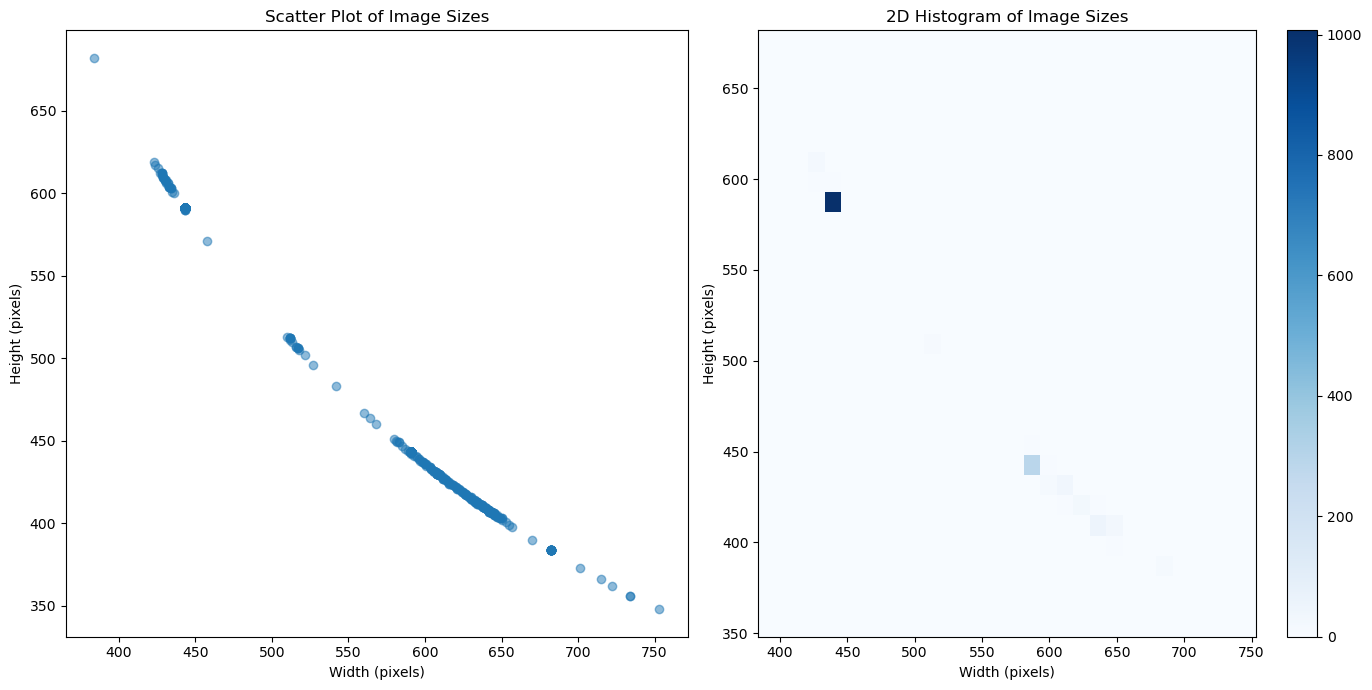

In [36]:
# 이미지 크기 저장을 위한 리스트
widths = []
heights = []

# 모든 이미지의 크기 수집
for image_file in image_files:
    image_path = os.path.join(image_folder_path, image_file)
    try:
        with Image.open(image_path) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
    except Exception as e:
        print(f"Error loading {image_file}: {e}")

# 이미지 크기 데이터프레임 생성
image_sizes = pd.DataFrame({'Width': widths, 'Height': heights})

# 이미지 크기 히스토그램
plt.figure(figsize=(14, 7))

# 산점도
plt.subplot(1, 2, 1)
plt.scatter(image_sizes['Width'], image_sizes['Height'], alpha=0.5)
plt.title('Scatter Plot of Image Sizes')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')

# 히스토그램
plt.subplot(1, 2, 2)
plt.hist2d(image_sizes['Width'], image_sizes['Height'], bins=30, cmap='Blues')
plt.colorbar()
plt.title('2D Histogram of Image Sizes')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')

plt.tight_layout()
plt.show()